In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [41]:
# Train_test_split
X = df.drop(columns=['Dt_Customer','Marital_Status','Education','Response'])
y = df['Response']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, X_test.shape

((1792, 25), (448, 25))

In [44]:
y_train.shape, y_test.shape

((1792,), (448,))

In [45]:
# Standardization

from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(X_train)

StandardScaler()

In [49]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
X_train_scaled

array([[-0.65272459, -1.59662471, -1.34442913, ..., -0.1062388 ,
         0.        ,  0.        ],
       [ 0.57088139, -0.50162444,  0.46766862, ..., -0.1062388 ,
         0.        ,  0.        ],
       [-1.38524002,  0.17222188,  0.76515894, ..., -0.1062388 ,
         0.        ,  0.        ],
       ...,
       [-0.67317398, -1.51239392,  0.58967867, ..., -0.1062388 ,
         0.        ,  0.        ],
       [-0.85660805, -0.50162444, -0.11648793, ..., -0.1062388 ,
         0.        ,  0.        ],
       [-0.40305892,  0.0037603 , -1.09907038, ..., -0.1062388 ,
         0.        ,  0.        ]])

In [51]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [52]:
X_train_scaled

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,-0.652725,-1.596625,-1.344429,-0.837921,-0.925567,0.019879,-0.870292,-0.460270,-0.679711,-0.467870,...,-0.839856,0.691498,3.503437,-0.273834,-0.284289,-0.261868,-0.108893,-0.106239,0.0,0.0
1,0.570881,-0.501624,0.467669,-0.837921,0.913253,-0.642394,0.373503,-0.286815,0.081870,2.086506,...,2.225363,-0.942744,-0.285434,-0.273834,-0.284289,-0.261868,-0.108893,-0.106239,0.0,0.0
2,-1.385240,0.172222,0.765159,-0.837921,0.913253,0.368444,2.107640,-0.658504,-0.396838,-0.688392,...,0.999275,1.100058,-0.285434,3.651849,-0.284289,-0.261868,-0.108893,-0.106239,0.0,0.0
3,1.644932,-0.080470,-0.871153,0.999967,-0.925567,-0.189260,-0.804515,-0.658504,-0.701470,-0.688392,...,-0.839856,1.100058,-0.285434,-0.273834,-0.284289,-0.261868,-0.108893,-0.106239,0.0,0.0
4,1.432503,0.003760,-1.818126,-0.837921,0.913253,-1.688088,-0.834414,-0.559387,-0.675359,-0.651638,...,-1.759422,-1.759865,-0.285434,-0.273834,-0.284289,-0.261868,-0.108893,-0.106239,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1.577174,0.003760,-0.301607,0.999967,0.913253,-1.095528,-0.810494,-0.633725,-0.684063,-0.651638,...,-0.839856,-0.125623,-0.285434,-0.273834,-0.284289,-0.261868,-0.108893,-0.106239,0.0,0.0
1788,1.326593,0.846068,0.377175,-0.837921,0.913253,0.263874,-0.397889,0.580460,-0.292393,0.322332,...,0.692753,-0.534184,-0.285434,-0.273834,-0.284289,-0.261868,-0.108893,-0.106239,0.0,0.0
1789,-0.673174,-1.512394,0.589679,-0.837921,0.913253,0.647296,1.554510,-0.460270,-0.496931,-0.486247,...,0.999275,0.691498,-0.285434,3.651849,-0.284289,-0.261868,-0.108893,-0.106239,0.0,0.0
1790,-0.856608,-0.501624,-0.116488,0.999967,0.913253,-0.956102,-0.726777,-0.658504,-0.688415,-0.688392,...,-0.533334,-0.534184,-0.285434,-0.273834,-0.284289,-0.261868,-0.108893,-0.106239,0.0,0.0


In [53]:
np.round(X_train.describe(), 1)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
count,1792.0,1792.0,1773.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,...,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0
mean,5617.6,1969.0,51963.6,0.5,0.5,48.4,295.1,26.6,167.2,37.5,...,5.7,5.3,0.1,0.1,0.1,0.1,0.0,0.0,3.0,11.0
std,3277.3,11.9,26152.8,0.5,0.5,28.7,334.6,40.4,229.8,54.4,...,3.3,2.4,0.3,0.3,0.3,0.2,0.1,0.1,0.0,0.0
min,0.0,1899.0,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
25%,2806.2,1959.0,34824.0,0.0,0.0,24.0,23.0,1.0,15.0,3.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
50%,5515.0,1970.0,50965.0,0.0,0.0,49.0,162.5,8.0,65.5,12.0,...,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
75%,8547.0,1978.0,68118.0,1.0,1.0,73.0,483.0,33.0,226.5,50.0,...,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
max,11191.0,1996.0,666666.0,2.0,2.0,99.0,1493.0,199.0,1725.0,259.0,...,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,11.0


In [57]:
np.round(X_train_scaled.describe(), 1)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
count,1792.0,1792.0,1773.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,...,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0,1792.0
mean,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
min,-1.7,-5.9,-1.9,-0.8,-0.9,-1.7,-0.9,-0.7,-0.7,-0.7,...,-1.8,-2.2,-0.3,-0.3,-0.3,-0.3,-0.1,-0.1,0.0,0.0
25%,-0.9,-0.8,-0.7,-0.8,-0.9,-0.9,-0.8,-0.6,-0.7,-0.6,...,-0.8,-0.9,-0.3,-0.3,-0.3,-0.3,-0.1,-0.1,0.0,0.0
50%,-0.0,0.1,-0.0,-0.8,-0.9,0.0,-0.4,-0.5,-0.4,-0.5,...,-0.2,0.3,-0.3,-0.3,-0.3,-0.3,-0.1,-0.1,0.0,0.0
75%,0.9,0.8,0.6,1.0,0.9,0.9,0.6,0.2,0.3,0.2,...,0.7,0.7,-0.3,-0.3,-0.3,-0.3,-0.1,-0.1,0.0,0.0
max,1.7,2.3,23.5,2.8,2.8,1.8,3.6,4.3,6.8,4.1,...,2.2,6.0,3.5,3.7,3.5,3.8,9.2,9.4,0.0,0.0


C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


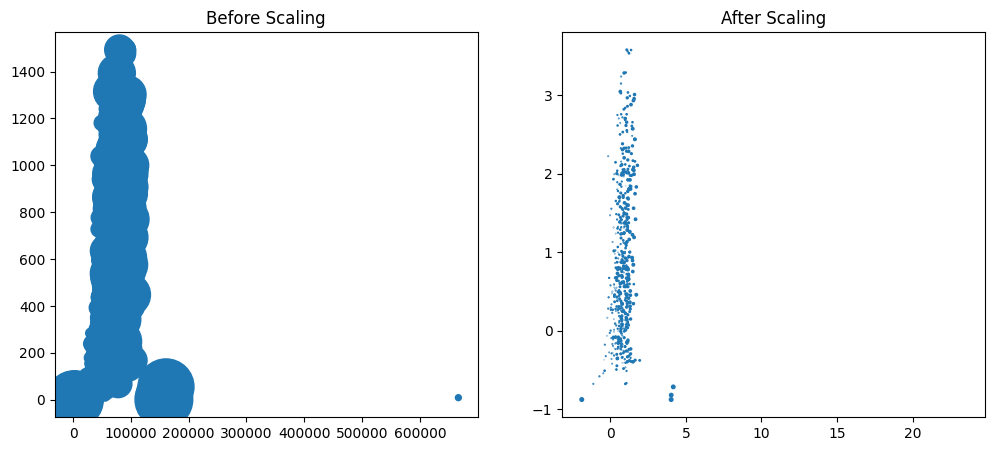

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Income'], X_train['MntWines'], X_train['MntMeatProducts'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Income'], X_train_scaled['MntWines'], X_train_scaled['MntMeatProducts'])
ax2.set_title('After Scaling')
plt.show()
